# Notebook to play with Complex Network Behaviors
## Example for introducing to the field of Complex Network
<u>Python Packages</u>:
<ul>
    <li>Igraph: link <a href="https://python.igraph.org/en/stable/index.html">site</a></li>
    <li>NetworkX <a href="https://networkx.org/documentation/stable/install.html">site</a></li>
</ul>

In [1]:
import networkx as nx
import networkit as nk
import matplotlib.pyplot as plt
import igraph as ig
import graph_tools as gt
import pandas as pd
import numpy as np
import cpnet
import NetBone as nb


In [2]:
G = nx.karate_club_graph()

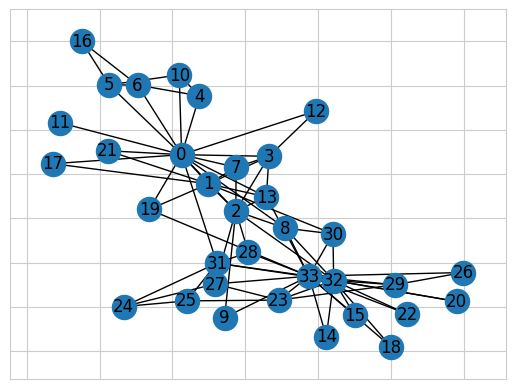

In [3]:
nx.draw_networkx(G)

In [4]:
alg = cpnet.BE() # Load the Borgatti-Everett algorithm
alg.detect(G) # Feed the network as an input

In [5]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

In [6]:
print(x)
print(set(c.values()))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1}
{0}


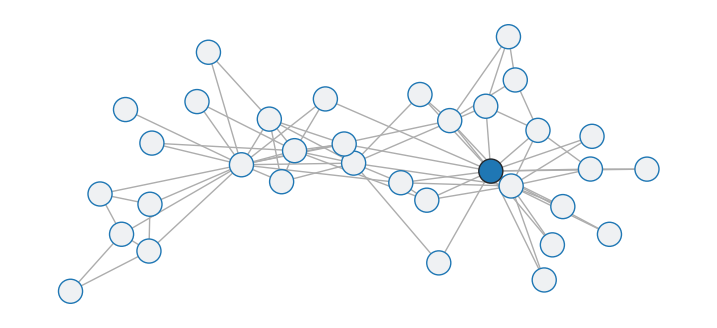

In [7]:
fig = plt.figure(figsize=(9, 4))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

In [37]:
algorithm = cpnet.KM_config()

In [38]:
G = nx.karate_club_graph()
algorithm.detect(G)

In [39]:
c = algorithm.get_pair_id()
x = algorithm.get_coreness()

In [40]:
print(c)
#print(x)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 3, 9: 3, 10: 1, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 1, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 3, 28: 2, 29: 3, 30: 3, 31: 2, 32: 3, 33: 3}


In [41]:
def erdos_renyi(G):
    n = G.number_of_nodes()
    p = nx.density(G)
    return nx.fast_gnp_random_graph(n, p)

In [42]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, G, algorithm, significance_level = 0.09, num_of_thread = 9)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 106.74it/s]


In [43]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, algorithm, significance_level=0.05, null_model=erdos_renyi
)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 123.50it/s]


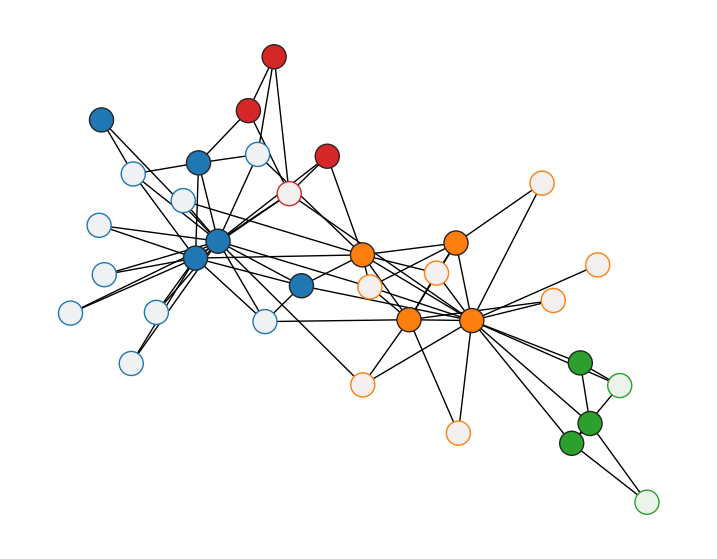

In [44]:
fig = plt.figure(figsize=(9, 7))
ax = plt.gca()
ax, pos =  cpnet.draw(G, c, x, ax, max_group_num = 5, draw_edge=True, draw_nodes_kwd={}, draw_edges_kwd={}, draw_labels_kwd={})

In [45]:
class MultiCorePeriphery:
    
    def __init__(self, graph, algorithm, *args, **kwargs):
        self.graph = graph
        self.algorithm = algorithm
        self.algorithm.detect(self.graph)
        self.cores = []
        self.cores_count = self.__core_periphery_count()
        self.c = algorithm.get_pair_id() 
        self.x = algorithm.get_coreness()
        self.core_periphery = self.__popuplate_cores()
        
    def __core_periphery_count(self):
        self.cores = list(set(c.values()))
        return len(self.cores)
        
    
    def core_extraction(self, index):
        keys = [k for k, v in self.c.items() if v == index]
        return keys
    
    def __popuplate_cores(self):
        self.core_periphery = []
        for index in self.cores:
            nodes = self.core_extraction(index)
            core_periphery = self.graph.subgraph(nodes)
            self.core_periphery.append(core_periphery)
        return self.core_periphery
    


class CorePeriphery:
    
    def __init__(self, graph, algorithm, *args, **kwargs):
        self.graph = graph
        self.algorithm = algorithm
        self.algorithm.detect(self.graph)
        self.pair_id = algorithm.get_pair_id() 
        self.coreness = algorithm.get_coreness()
        self.core = self.__set_core()
        self.periphery = self.__set_periphery()
        
    def __set_core(self) -> nx.Graph:
        keys = [k for k, v in self.coreness.items() if v == 1]
        return self.graph.subgraph(keys)
    
    def __set_periphery(self):
        keys = [k for k, v in self.coreness.items() if v == 0]
        return self.graph.subgraph(keys)

In [46]:
multi_core_peripheries_structures = MultiCorePeriphery(nx.karate_club_graph(), cpnet.KM_config())

In [47]:
# Mesurer la densité du core 
# Mesurer la densité entre les noeuds peripheriques
# Mesurer la densité entre les noeuds du cores et de la périphérie

# Application d'algorithme de détection de structure core-peripherique
## Borgatti Everett @BE (class 0: core, class 1: periphery)
### Premier core-periphery du réseau KareteClub

In [48]:
len(multi_core_peripheries_structures.core_periphery)

4

In [49]:
network = multi_core_peripheries_structures.core_periphery[0]
core_zero = CorePeriphery(network, cpnet.BE())

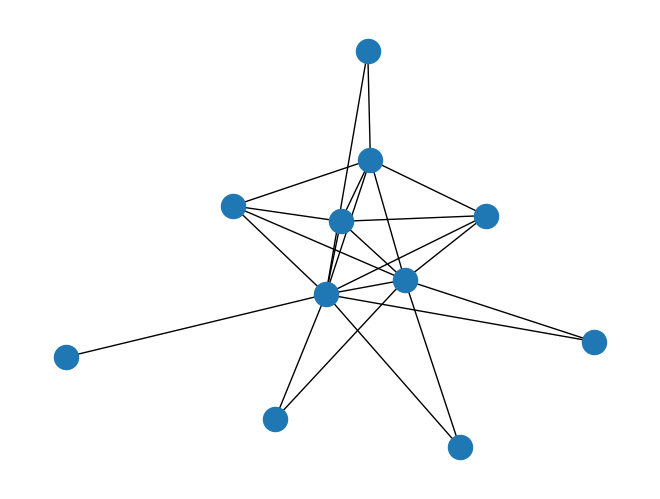

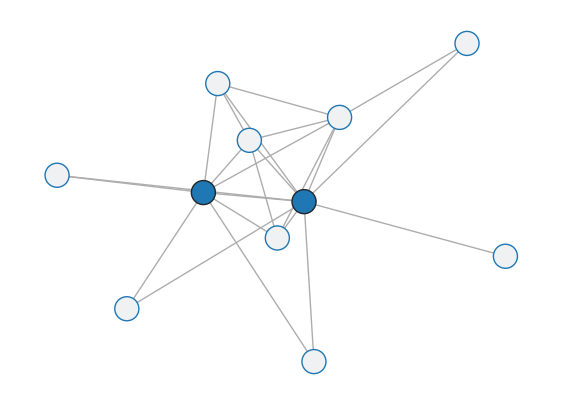

In [50]:
## Draw network and the core-periphery algo result
core_zero.algorithm.detect(core_zero.graph)
c = core_zero.pair_id
x = core_zero.coreness
nx.draw(network)

fig = plt.figure(figsize=(7, 5))
ax = plt.gca()
ax, pos = cpnet.draw(network, c, x, ax)

## Calcul des densités

In [51]:
# Density of the network
nx.density(network)

0.41818181818181815

In [52]:
nx.number_of_nodes(network)

11

density of the core :1.0


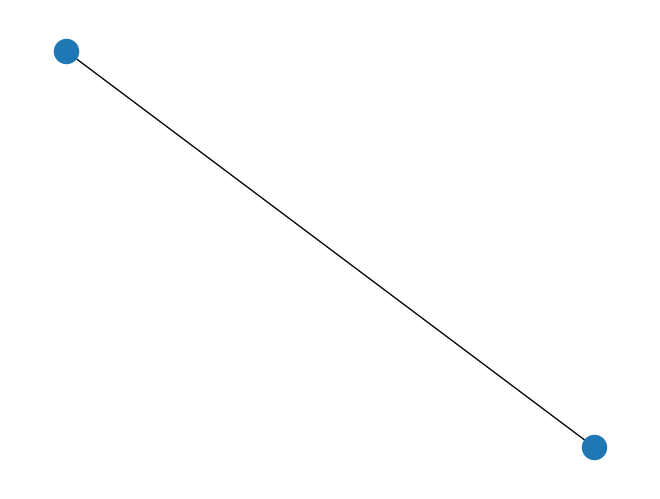

In [53]:
# Densité du Core(dc)
nx.draw(core_zero.core)
dc = nx.density(core_zero.core)
print("density of the core :"+ str(dc))

density of the periphery :0.16666666666666666


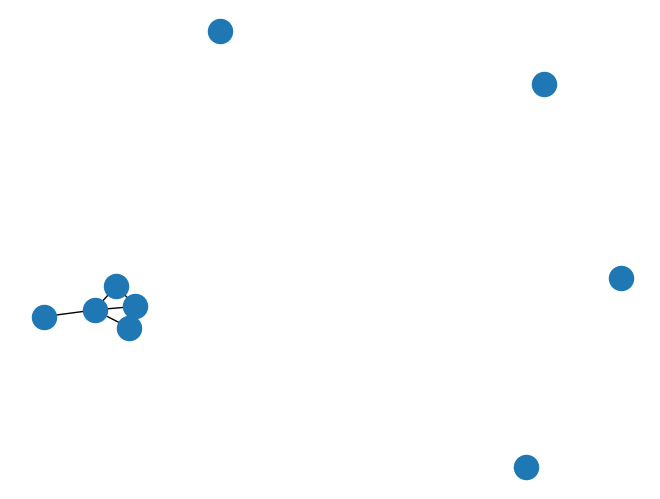

In [54]:
# Densité du périphérie(dp)
nx.draw(core_zero.periphery)
dp = nx.density(core_zero.periphery)
print("density of the periphery :"+ str(dp))

In [55]:
# Densité core-périphérie(dcp)
def compute_densities(core_periphery: CorePeriphery) -> tuple:
    densities: tuple = {}
    core_edges = list(core_periphery.core)
    periphery_edges = list(core_periphery.periphery)
    
    densities["graph-density"] = nx.density(core_periphery.graph)
    
    densities["core-density"] = nx.density(core_periphery.core)
    
    densities["periphery-density"] = nx.density(core_periphery.periphery)
    
    network = nx.Graph(core_periphery.graph)
    
    core_edges = list(core_periphery.core.edges)
    periphery_edges = list(core_periphery.periphery.edges)
    network.remove_edges_from(core_edges)
    network.remove_edges_from(periphery_edges)
    densities["core-periphery-density"] = nx.density(network)
    
    return densities, network

In [33]:
densities, graph = compute_densities(core_zero)
print(densities)

{'graph-density': 0.6666666666666666, 'core-density': 0, 'periphery-density': 0.3333333333333333, 'core-periphery-density': 0.5}


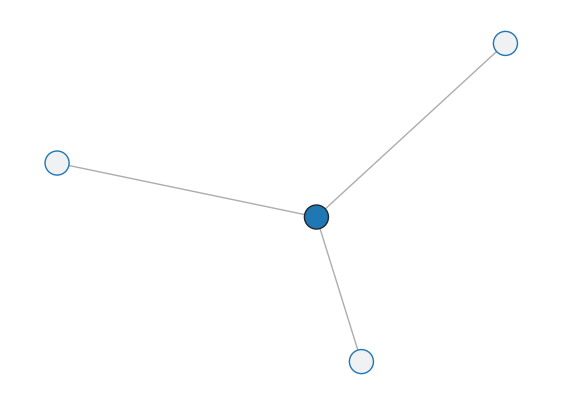

In [34]:
fig = plt.figure(figsize=(7, 5))
ax = plt.gca()
ax, pos = cpnet.draw(graph, c, x, ax)